#**1. Data Extraction**

In [ ]:
import pandas as pd
import os

# List of data file paths
data_files = [
    '/content/usa_new york city_affinia_manhattan',
    '/content/usa_new york city_6_columbus',
    '/content/usa_new york city_casablanca_hotel',
    '/content/usa_new york city_blue_moon_hotel',
    '/content/usa_new york city_courtyard_new_york_manhattan_fifth_avenue',
]

all_data = []

# Iterate through each file and parse it
for data_file in data_files:
    parsed_data = []

    with open(data_file, 'r', encoding='ISO-8859-1') as file:
        for line in file:
            # Split the line by tabs
            data = line.split('\t')

            # Check if the data has enough fields
            if len(data) >= 3:
                date = data[0].strip()  # Date
                title = data[1].strip()  # Review title
                review = data[2].strip()  # Review text


                parsed_data.append([date, title, review])

    # Convert parsed data to a DataFrame
    df = pd.DataFrame(parsed_data, columns=['Date', 'Title', 'Review'])

    all_data.append(df)

# merge all DataFrames into one
merged_df = pd.concat(all_data, ignore_index=True)

# Save the merged DataFrame to a CSV file
output_csv = '/content/new_york_hotels_reviews.csv'
merged_df.to_csv(output_csv, index=False)

# Confirm the file has been saved
print(f"All data has been saved to {output_csv}")


All data has been saved to /content/new_york_hotels_reviews.csv


In [ ]:
num_rows = merged_df.shape[0]
print(num_rows)

1092


In [ ]:
display(merged_df.head())

,Date,Title,Review
0,,Excellent location and great staff,This was our first trip to New York so I was u...
1,,Fabulous stay at the Affinia,Stayed 5 nights at the Affinia Manhatten in a ...
2,,Excellent city - great base for hotel,We stayed at the Affinia from the 23rd to the ...
3,,We loved Affinia Manhattan!,We loved this hotel. The room was great! We ha...
4,,City Noise,My teenage daughter and I stayed one night 11/...


#**2. Preprocessing**

In [ ]:

import re
from sklearn.model_selection import train_test_split

# Load your dataset
file_path = '/content/new_york_hotels_reviews.csv'
df = pd.read_csv(file_path)

# Step 1: Cleaning
def clean_text(text):
    # Remove special characters and numbers, keep only words
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text


df['cleaned_text'] = df['Review'].apply(lambda x: clean_text(x) if pd.notnull(x) else '')

# Step 2: Handling missing data
df = df.dropna(subset=['Review'])

# Step 3: Splitting the data into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Display the first few rows to verify the process
print(display(train_data[['Review', 'cleaned_text']].head()))


,Review,cleaned_text
535,Spent 3 nights at the Casablanca. Mostly first...,spent nights at the casablanca mostly first cl...
355,This hotel was great for a number of reasons. ...,this hotel was great for a number of reasons o...
545,We spent two nights in this hotel and would de...,we spent two nights in this hotel and would de...
462,Excellent location in Times Square with no noi...,excellent location in times square with no noi...
1028,I stayed at the Courtyard Marriott when it was...,i stayed at the courtyard marriott when it was...


None


#**3. VADER for sentiment labeling**

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# taking the idea from the medium article, given a threshold for 3 sentiment
def vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    compound = score['compound']  # Extract compound score
    # Use thresholds to classify the sentiment
    if compound >= 0.05:
        sentiment = 'Positive'
    elif compound <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    return compound, sentiment

# Apply VADER sentiment analysis
df['compound_score'], df['sentiment'] = zip(*df['cleaned_text'].apply(lambda x: vader_sentiment(x)))

df[['cleaned_text', 'compound_score', 'sentiment']].sample(10)

,cleaned_text,compound_score,sentiment
656,we chose the casablance hotel off the back of ...,0.9961,Positive
513,this hotel is truely a hidden gem about steps ...,0.9702,Positive
80,to begin w the staff at this hotel is probably...,0.9739,Positive
117,i stayed at the affinia manhattan for four nig...,0.9472,Positive
166,we are a family of ten most of us in new york ...,0.9509,Positive
595,we arrived at am and our room was already read...,0.9679,Positive
535,spent nights at the casablanca mostly first cl...,0.8779,Positive
621,i booked five nightsl for my parters th and fr...,0.9639,Positive
919,i decided to do some family genealogy and take...,0.9476,Positive
381,we have just returned from our stay at columbu...,0.9973,Positive


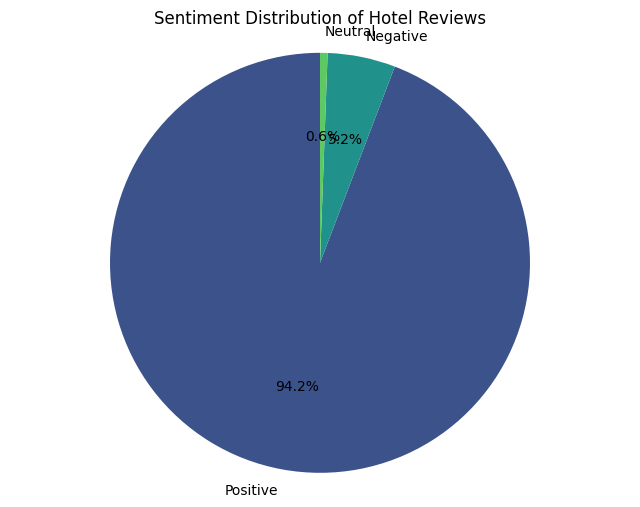

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(sentiment_counts)))


plt.title('Sentiment Distribution of Hotel Reviews')
plt.axis('equal')

plt.show()


In [ ]:
# Save the resulting DataFrame into a new CSV file
output_csv = '/content/new_york_hotels_reviews_with_sentiment.csv'
df.to_csv(output_csv, index=False)

# Confirm the file has been saved
print(f"Data with sentiment has been saved to {output_csv}")


Data with sentiment has been saved to /content/new_york_hotels_reviews_with_sentiment.csv


In [ ]:
df.head()

,Date,Title,Review,cleaned_text,compound_score,sentiment
0,NaN,Excellent location and great staff,This was our first trip to New York so I was u...,this was our first trip to new york so i was u...,0.9668,Positive
1,NaN,Fabulous stay at the Affinia,Stayed 5 nights at the Affinia Manhatten in a ...,stayed nights at the affinia manhatten in a st...,0.9895,Positive
2,NaN,Excellent city - great base for hotel,We stayed at the Affinia from the 23rd to the ...,we stayed at the affinia from the rd to the th...,0.9858,Positive
3,NaN,We loved Affinia Manhattan!,We loved this hotel. The room was great! We ha...,we loved this hotel the room was great we had ...,0.9586,Positive
4,NaN,City Noise,My teenage daughter and I stayed one night 11/...,my teenage daughter and i stayed one night we ...,0.9436,Positive


In [ ]:
len(df)

1035

In [ ]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
Positive,975
Negative,54
Neutral,6


#**4. Synthesize Data**

In [ ]:
import openai
from openai import OpenAI
from google.colab import userdata
# Retrieve the API key from user secrets
secret_key = userdata.get('openAI')

# Initialize OpenAI client with the API key
client = OpenAI(api_key=secret_key)

In [ ]:
import pandas as pd

def synthesize_reviews_chat(sentiment_label, num_samples, batch_size=10):
    reviews = []

    for i in range(0, num_samples, batch_size):
        batch_num = min(batch_size, num_samples - i)
        messages = [
            {"role": "system", "content": "You are an assistant that generates hotel reviews."},
            {"role": "user", "content": f"Generate {batch_num} hotel reviews that are {sentiment_label} in sentiment."}
        ]

        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=messages,
            max_tokens=200 * batch_num,
            n=1,
            temperature=0.7
        )

        generated_text = response.choices[0].message.content
        reviews_batch = generated_text.split('\n')
        reviews += [review.strip() for review in reviews_batch if review.strip()]

    return reviews


In [ ]:

original_data = pd.read_csv('/content/new_york_hotels_reviews_with_sentiment.csv')

# Get counts of each sentiment in the original data
positive_count = len(original_data[original_data['sentiment'] == 'Positive'])
negative_count = len(original_data[original_data['sentiment'] == 'Negative'])
neutral_count = len(original_data[original_data['sentiment'] == 'Neutral'])

# Calculate how many negative and neutral reviews are needed to balance the dataset
negative_needed = positive_count - negative_count
neutral_needed = positive_count - neutral_count

# Synthesize reviews for negative and neutral
new_negative_reviews = synthesize_reviews_chat('Negative', negative_needed)
new_neutral_reviews = synthesize_reviews_chat('Neutral', neutral_needed)

# Create DataFrames for the synthesized reviews
negative_df = pd.DataFrame(new_negative_reviews, columns=['review_text'])
negative_df['sentiment'] = 'Negative'

neutral_df = pd.DataFrame(new_neutral_reviews, columns=['review_text'])
neutral_df['sentiment'] = 'Neutral'

# Extract the positive reviews from the original data
positive_df = original_data[original_data['sentiment'] == 'Positive'][['cleaned_text']]
positive_df.rename(columns={'cleaned_text': 'review_text'}, inplace=True)
positive_df['sentiment'] = 'Positive'

# Combine the positive, negative, and neutral DataFrames
combined_data = pd.concat([positive_df, negative_df, neutral_df], ignore_index=True)

# Display the combined DataFrame
print(combined_data.head())  # Show the first few rows of the combined data

# Print the value counts of the sentiments in the combined DataFrame
print(combined_data['sentiment'].value_counts())

                                         review_text sentiment
0  this was our first trip to new york so i was u...  Positive
1  stayed nights at the affinia manhatten in a st...  Positive
2  we stayed at the affinia from the rd to the th...  Positive
3  we loved this hotel the room was great we had ...  Positive
4  my teenage daughter and i stayed one night we ...  Positive
sentiment
Positive    975
Neutral     969
Negative    921
Name: count, dtype: int64


In [ ]:
len(combined_data)

2865

In [ ]:
display(combined_data)

,review_text,sentiment
0,this was our first trip to new york so i was u...,Positive
1,stayed nights at the affinia manhatten in a st...,Positive
2,we stayed at the affinia from the rd to the th...,Positive
3,we loved this hotel the room was great we had ...,Positive
4,my teenage daughter and i stayed one night we ...,Positive
...,...,...
2860,5. The breakfast buffet had a good variety of ...,Neutral
2861,6. The hotel was conveniently located near att...,Neutral
2862,"7. The room was spacious and clean, but I foun...",Neutral
2863,"8. The hotel had a nice pool area, but the Wi-...",Neutral


In [ ]:
# Save the combined data to a CSV file
combined_data.to_csv('balanced_reviews.csv', index=False)

#**5. Drop Duplicated Data**

In [5]:
import pandas as pd
data = pd.read_csv('/content/balanced_reviews.csv')

# Remove duplicate rows
df_cleaned = data.drop_duplicates()
df_cleaned.reset_index(drop=True, inplace=True)

# Save the cleaned DataFrame back to a CSV file
df_cleaned.to_csv('/content/cleaned_dataset.csv', index=False)

# Display the first few rows of the cleaned DataFrame
df_cleaned.head()

,review_text,sentiment
0,this was our first trip to new york so i was u...,Positive
1,stayed nights at the affinia manhatten in a st...,Positive
2,we stayed at the affinia from the rd to the th...,Positive
3,we loved this hotel the room was great we had ...,Positive
4,my teenage daughter and i stayed one night we ...,Positive


In [6]:
df_cleaned.shape

(2797, 2)

In [7]:
len(df_cleaned)

2797